<a href="https://www.kaggle.com/code/trangnguyenthuy/shape-face-detection?scriptVersionId=233448945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-shape-dataset/FaceShape Dataset/desktop.ini
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (658).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (531).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (994).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (687).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (16).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (282).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (393).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (388).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (520).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (674).jpg
/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set/Oval/oval (231).jpg
/kaggle/input/face-shape-

In [17]:
#!pip install tensorflow_datasets

import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [8]:
base_dir ='/kaggle/input/face-shape-dataset/FaceShape Dataset'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/training_set'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/testing_set'))

Contents of base directory:
['testing_set', 'desktop.ini', 'training_set']

Contents of train directory:
['Oval', 'Heart', 'Round', 'Square', 'desktop.ini', 'Oblong']

Contents of validation directory:
['Oval', 'Heart', 'Round', 'Square', 'Oblong']


In [9]:
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'testing_set')
# Directory with training cat/dog pictures
train_oval = os.path.join(train_dir, 'Oval')
train_heart = os.path.join(train_dir, 'Heart')
train_round = os.path.join(train_dir, 'Round')
train_square = os.path.join(train_dir, 'Square')
train_oblong = os.path.join(train_dir, 'Oblong')


# Directory with validation cat/dog pictures
test_oval = os.path.join(test_dir, 'Oval')
test_heart = os.path.join(test_dir, 'Heart')
test_round = os.path.join(test_dir, 'Round')
test_square = os.path.join(test_dir, 'Square')
test_oblong = os.path.join(test_dir, 'Oblong')

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/training_set'))
print("\nContents of test directory:")
print(os.listdir(f'{base_dir}/testing_set'))


Contents of train directory:
['Oval', 'Heart', 'Round', 'Square', 'desktop.ini', 'Oblong']

Contents of test directory:
['Oval', 'Heart', 'Round', 'Square', 'Oblong']


In [10]:
train_heart_fnames = os.listdir( train_heart )
train_oval_fnames = os.listdir( train_oval )
test_round_fnames = os.listdir( test_round )
test_square_fnames = os.listdir( test_square )
test_oblong_fnames = os.listdir( test_oblong )
print(train_heart_fnames[:10])


['heart (210).jpg', 'heart (356).jpg', 'heart (45).jpg', 'heart (466).jpg', 'heart (425).jpg', 'heart (634).jpg', 'heart (994).jpg', 'heart (902).jpg', 'heart (435).jpg', 'heart (943).jpg']


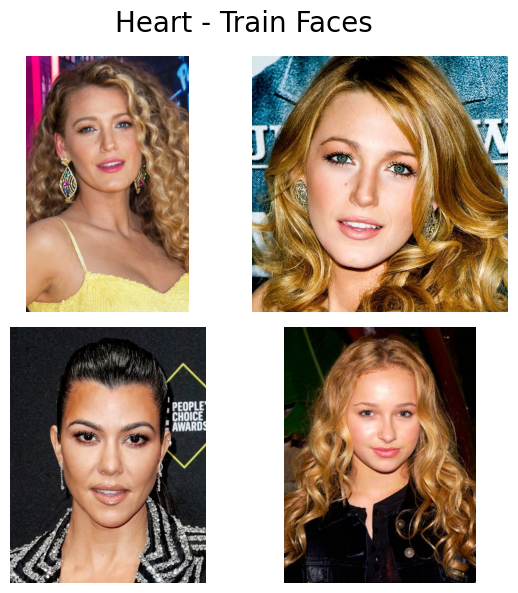

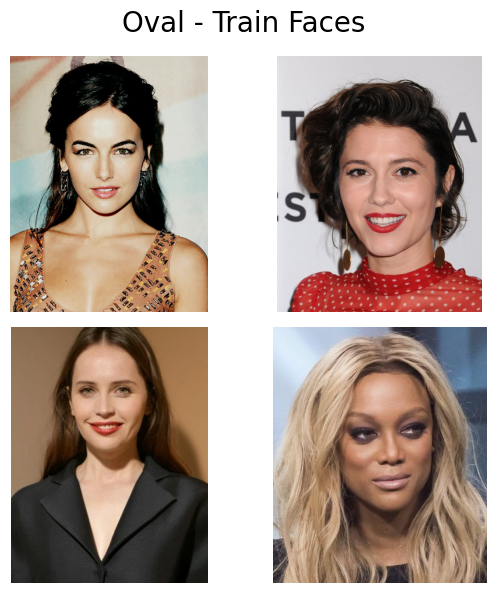

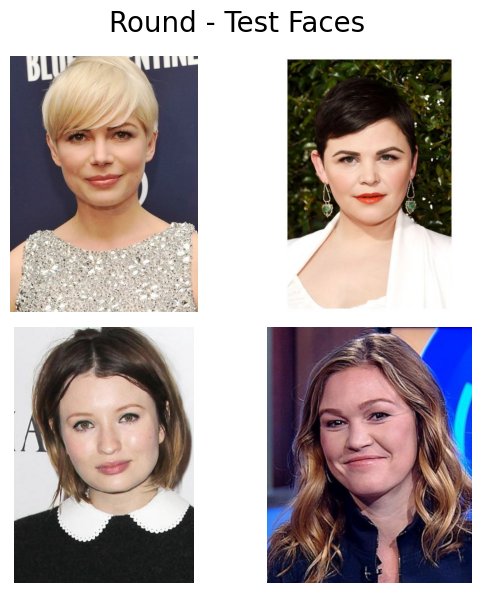

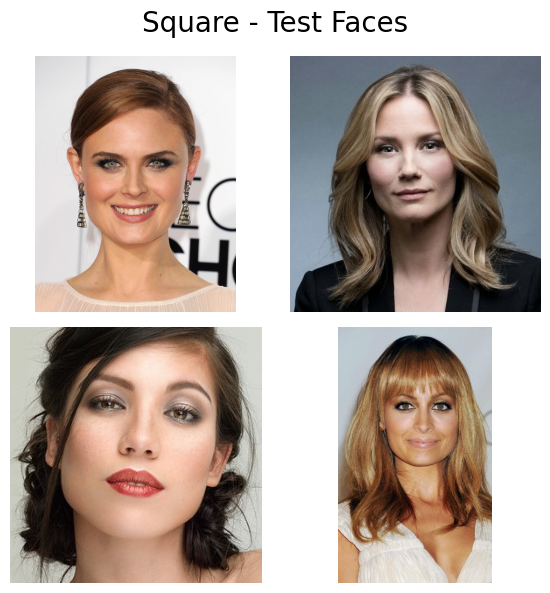

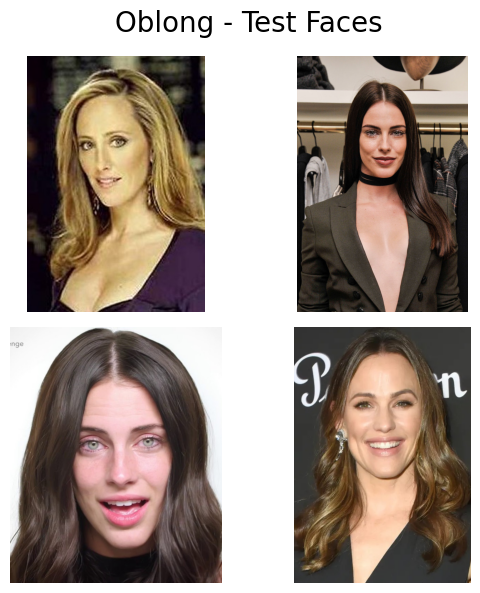

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
face_shapes = ['Oval', 'Heart', 'Round', 'Square', 'Oblong']

nrows = 2
ncols = 2
num_images = nrows * ncols

def show_face_shape_images(folder_path, fnames, shape_name, nrows=2, ncols=2):
    fig = plt.figure(figsize=(ncols * 3, nrows * 3))
    fig.suptitle(f"{shape_name} Faces", fontsize=20)

    for i, fname in enumerate(fnames[:nrows * ncols]):
        img_path = os.path.join(folder_path, fname)
        img = mpimg.imread(img_path)

        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        plt.imshow(img)

    plt.tight_layout()
    plt.show()
show_face_shape_images(train_heart, train_heart_fnames, "Heart - Train")
show_face_shape_images(train_oval, train_oval_fnames, "Oval - Train")
show_face_shape_images(test_round, test_round_fnames, "Round - Test")
show_face_shape_images(test_square, test_square_fnames, "Square - Test")
show_face_shape_images(test_oblong, test_oblong_fnames, "Oblong - Test")

In [7]:
def gen_model():


    # Defines & compiles the model
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])


    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

    return model



In [8]:
model = gen_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-11 14:12:31.515769: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,997 (40.58 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
def train_model(model):
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import matplotlib.pyplot as plt
    from PIL import ImageFile
    ImageFile.LOAD_TRUNCATED_IMAGES = True


    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    valid_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/face-shape-dataset/FaceShape Dataset/training_set',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical'
    )
    
    validation_generator = valid_datagen.flow_from_directory(
        '/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical'
    )

    # Train model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        verbose=1
    )
    return history

In [10]:
history = train_model(model)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


267/267 ━━━━━━━━━━━━━━━━━━━━ 127s 462ms/step - accuracy: 0.1946 - loss: 2.0803 - val_accuracy: 0.1990 - val_loss: 1.6093
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 121s 447ms/step - accuracy: 0.2075 - loss: 1.6101 - val_accuracy: 0.1950 - val_loss: 1.6094
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 122s 450ms/step - accuracy: 0.1941 - loss: 1.6096 - val_accuracy: 0.2060 - val_loss: 1.6082
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 140s 445ms/step - accuracy: 0.2069 - loss: 1.6103 - val_accuracy: 0.2090 - val_loss: 1.6092
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 117s 432ms/step - accuracy: 0.2033 - loss: 1.6103 - val_accuracy: 0.1910 - val_loss: 1.6095
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 117s 433ms/step - accuracy: 0.1900 - loss: 1.6098 - val_accuracy: 0.2210 - val_loss: 1.6119
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 117s 433ms/step - accuracy: 0.1934 - loss: 1.6092 - val_accuracy: 0.2120 - val_loss: 1.6093
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 118s 436ms/step - accuracy: 0.2039 - loss: 1.60

In [11]:
# Biểu đồ
def assess(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(10)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

    print("Training Accuracy:", acc[-1])
    print("Validation Accuracy:", val_acc[-1])    

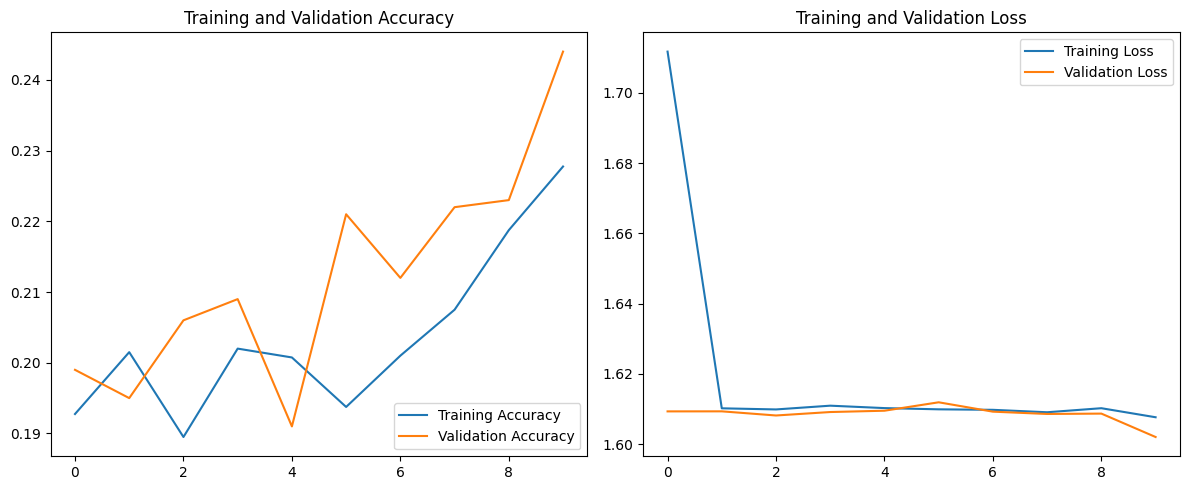

Training Accuracy: 0.2277500033378601
Validation Accuracy: 0.24400000274181366


In [12]:
assess(history)

# MobileNet

In [14]:
def gen_mobilenetv2():
    num_classes = 5

    #  Load MobileNetV2 base
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(150,150,3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze base

    # Add custom head
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [15]:
def train_mobilenetv2():
    # Data augmentation
    train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/face-shape-dataset/FaceShape Dataset/training_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )
    
    validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/face-shape-dataset/FaceShape Dataset/testing_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )
    model = gen_mobilenetv2()
    # Train
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        verbose=1
    )
    return history

In [18]:
history_v2 = train_mobilenetv2()
assess(history)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


/tmp/ipykernel_31/3089644992.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(
2025-04-12 10:52:00.237780: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 125s 890ms/step - accuracy: 0.2273 - loss: 1.8028 - val_accuracy: 0.3240 - val_loss: 1.5319
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 619ms/step - accuracy: 0.2824 - loss: 1.5597 - val_accuracy: 0.3480 - val_loss: 1.4951
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 618ms/step - accuracy: 0.2962 - loss: 1.5456 - val_accuracy: 0.3610 - val_loss: 1.4788
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 611ms/step - accuracy: 0.3218 - loss: 1.5221 - val_accuracy: 0.3810 - val_loss: 1.4803
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 684ms/step - accuracy: 0.3256 - loss: 1.5061 - val_accuracy: 0.3750 - val_loss: 1.4632
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 621ms/step - accuracy: 0.3446 - loss: 1.4866 - val_accuracy: 0.3770 - val_loss: 1.4498
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 620ms/step - accuracy: 0.3475 - loss: 1.4838 - val_accuracy: 0.3900 - val_loss: 1.4442
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 610ms/step - accuracy: 0.3454 - loss: 1.4816 - va

NameError: name 'assess' is not defined